<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/04_Computer_vision_and_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow**

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## **ARCHITECTURE OF CNN**

| Hyperparameter/Layer type | What does it do? | Typical values |
| ------------------------ | --------- | ------------ |
| Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of|
| Input layer | Takes in target images and preprocesses them for further layers | input_shape = [batch_size, image_height, image_width, color_channels] |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.keras.layer.ConvXD` (X can be multiple values)  |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually `relu` |
| Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.leras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully connected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | output_Shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi) |
| Output Activation | Adds non-linearity output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multiclass classification). |

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified if to only use two classes (pizza & steak)

In [1]:
import tensorflow as tf
print("Tensorflow we're using: ", tf.__version__)

Tensorflow we're using:  2.19.0


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-31 12:00:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.253.118.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.5MB/s    in 5.7s    

2025-08-31 12:00:54 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in images in '{dirpath}")

There are 2 directories and 0 in images in 'pizza_steak
There are 2 directories and 0 in images in 'pizza_steak/test
There are 0 directories and 250 in images in 'pizza_steak/test/steak
There are 0 directories and 250 in images in 'pizza_steak/test/pizza
There are 2 directories and 0 in images in 'pizza_steak/train
There are 0 directories and 750 in images in 'pizza_steak/train/steak
There are 0 directories and 750 in images in 'pizza_steak/train/pizza


In [7]:
# Another way to find out that how many images are in a file
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

To visualize our images, first let's get the class names.

In [8]:
# get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), k=1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['2159975.jpg']
Image shape: (512, 512, 3)


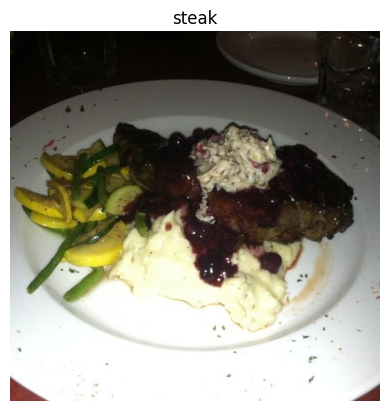

In [10]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
tf.cast(tf.constant(img), dtype=tf.float32)  # our neural network converted image into tensors

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[ 47.,  41.,  25.],
        [ 52.,  46.,  30.],
        [ 48.,  45.,  30.],
        ...,
        [  5.,   5.,   3.],
        [  5.,   5.,   3.],
        [  4.,   4.,   2.]],

       [[ 41.,  35.,  19.],
        [ 49.,  43.,  27.],
        [ 48.,  45.,  30.],
        ...,
        [  7.,   7.,   5.],
        [  7.,   7.,   5.],
        [  7.,   7.,   5.]],

       [[ 34.,  28.,  12.],
        [ 44.,  38.,  22.],
        [ 45.,  42.,  27.],
        ...,
        [  5.,   6.,   1.],
        [  5.,   6.,   1.],
        [  5.,   6.,   1.]],

       ...,

       [[130.,  57.,  50.],
        [130.,  57.,  50.],
        [130.,  57.,  50.],
        ...,
        [ 91.,  40.,  36.],
        [ 91.,  40.,  36.],
        [ 90.,  39.,  35.]],

       [[130.,  60.,  50.],
        [130.,  60.,  50.],
        [129.,  59.,  49.],
        ...,
        [ 91.,  38.,  34.],
        [ 92.,  39.,  35.],
        [ 93.,  40.,  36.]],

       [[126.,  5

In [12]:
# View the image shape
img.shape # (width, height, color_channels)

(512, 512, 3)

`Note:` As we've discussed before, many machine learning models, including neural network prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.18431373, 0.16078431, 0.09803922],
        [0.20392157, 0.18039216, 0.11764706],
        [0.18823529, 0.17647059, 0.11764706],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01568627, 0.01568627, 0.00784314]],

       [[0.16078431, 0.1372549 , 0.0745098 ],
        [0.19215686, 0.16862745, 0.10588235],
        [0.18823529, 0.17647059, 0.11764706],
        ...,
        [0.02745098, 0.02745098, 0.01960784],
        [0.02745098, 0.02745098, 0.01960784],
        [0.02745098, 0.02745098, 0.01960784]],

       [[0.13333333, 0.10980392, 0.04705882],
        [0.17254902, 0.14901961, 0.08627451],
        [0.17647059, 0.16470588, 0.10588235],
        ...,
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157]],

       ...,

       [[0.50980392, 0.22352941, 0.19607843],
        [0.50980392, 0.22352941, 0.19607843],
        [0.50980392, 0

## Building CNN model

Let's build a `Convolutional Neural Network` to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our image
* Compile our CNN
* Fit the CNN model to training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)  # random seed for reproducability

# Preprocess data (scaling / normalize)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up data to data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn in into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

# flow_from_directory automatically creates features and labels, so we are not passing X and y
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.5353 - loss: 0.7176 - val_accuracy: 0.7860 - val_loss: 0.4653
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.7381 - loss: 0.5231 - val_accuracy: 0.8220 - val_loss: 0.4503
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8093 - loss: 0.4398 - val_accuracy: 0.8620 - val_loss: 0.3719
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8249 - loss: 0.4042 - val_accuracy: 0.8640 - val_loss: 0.3490
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.8327 - loss: 0.3922 - val_accuracy: 0.8780 - val_loss: 0.3195


**Note:** Make sure to use a GPU for faster execution of epochs.

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before


In [16]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.4979 - loss: 0.6998
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4819 - loss: 0.6922
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4931 - loss: 0.7037
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5052 - loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5023 - loss: 0.6931


In [17]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite being having 20x more parameters than our CNN(model_1), model_2 performs not good.

In [18]:
# Improving model_2

tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.models.Sequential([
    # Increasing number of layers
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),  # Increasing number of hidden units
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.6385 - loss: 2.1296 - val_accuracy: 0.7900 - val_loss: 0.6007
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7226 - loss: 0.7729 - val_accuracy: 0.7760 - val_loss: 0.4766
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.7783 - loss: 0.5259 - val_accuracy: 0.7800 - val_loss: 0.4905
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.7358 - loss: 0.5615 - val_accuracy: 0.7760 - val_loss: 0.5287
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7598 - loss: 0.5601 - val_accuracy: 0.7980 - val_loss: 0.4356


In [19]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [20]:
multiples = 15073201/31101 # where, 15073201 = trainable params of model_3 && 31101 are trainable params of model_1(CNN)
print(f"Model_3 has almost {multiples}x times more trainable params than model_1\n still outperformed by model_1..")

Model_3 has almost 484.6532587376612x times more trainable params than model_1
 still outperformed by model_1..


`Note:`  You can think of trainable parameters as **patterns a model can learn from data**. Intuitvely, you might think more is a better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification

1. Visualize the data
2. Preprocess the data (the main step here is scaling/normalization/converting into batches).
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied ( experimentation....)

### Visualize the data

['2832960.jpg']
Image shape: (384, 512, 3)
['898843.jpg']
Image shape: (512, 512, 3)


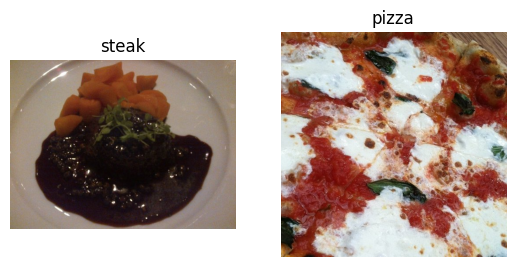

In [21]:
# Visualzie the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data

In [22]:
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

> A batch is a small subset of data. Rather than look at all ~1500 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. ~1,500 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in ~1,500 images in one hit could result in the model not being able to learn very well.

> Why 32?

> Because 32 is good for your health...

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_datagen, test_datagen

(<keras.src.legacy.preprocessing.image.ImageDataGenerator at 0x7f3c9030bbf0>,
 <keras.src.legacy.preprocessing.image.ImageDataGenerator at 0x7f3c9026a690>)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target dir of images
                                               target_size=(224,224), # Target size of images
                                               class_mode="binary",  # type of data you're working with
                                               batch_size=32) # size of mini batches to load data

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of train data batch
images, labels = train_data.__next__() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the images
images[:3], images[0].shape

(array([[[[0.30588236, 0.17254902, 0.227451  ],
          [0.34901962, 0.21960786, 0.25490198],
          [0.4039216 , 0.2784314 , 0.2901961 ],
          ...,
          [0.16470589, 0.02745098, 0.1137255 ],
          [0.16862746, 0.01960784, 0.11764707],
          [0.15686275, 0.00784314, 0.10588236]],
 
         [[0.28235295, 0.14901961, 0.20392159],
          [0.34117648, 0.21176472, 0.24705884],
          [0.42352945, 0.29803923, 0.30980393],
          ...,
          [0.17254902, 0.02352941, 0.1137255 ],
          [0.1764706 , 0.02745098, 0.11764707],
          [0.16078432, 0.01176471, 0.10980393]],
 
         [[0.26666668, 0.13333334, 0.19607845],
          [0.32941177, 0.20000002, 0.23529413],
          [0.42352945, 0.29803923, 0.31764707],
          ...,
          [0.19215688, 0.04313726, 0.13333334],
          [0.1764706 , 0.02745098, 0.11764707],
          [0.16862746, 0.03137255, 0.1254902 ]],
 
         ...,
 
         [[0.62352943, 0.5803922 , 0.5647059 ],
          [0.60392

In [29]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

### Creating a CNN model (with baseline)

A *baseline* is a relatively simple model or existing result that we setup when beginning a machine learning experiment and then as we keep experimenting, we try to beat the baseline.

In [30]:
# Importing required dependencies for our model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [31]:
# Creating the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification)
])

| Hyperparameter name | What does it do? | Typical values |
| :----------------- | :--------------- | :------------------- |
| Filters | Decides how many filters should pass over an input tensor(e.g. sliding windows over an image). | 10, 32, 64, 128 (higher values lead to more complex models) |
| Kernel size (also called filter size) | Determines the shape of the filters (sliding windows) over the output. | 3, 5, 7 (lower values learn smaller features, higher values learn larger features) |
| Padding | Pads the target tensor with zeroes( if "same" ) to preserve input shape. Or leaves in the target as is ( if "valid"), lowering output shape. | "same" or "valid" . |
| Strides | The number of steps a filter takes across an image at a time (e.g. if strides=1, a filter moves across an image 1 pixel at a time). | 1 (default), 2 |

### Compiling the model

In [32]:
# Compiling the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [33]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### Fit the model

In [34]:
# Check the length of training anf test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.5531 - loss: 2.6581 - val_accuracy: 0.7900 - val_loss: 0.5020
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7926 - loss: 0.4622 - val_accuracy: 0.8600 - val_loss: 0.3641
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8292 - loss: 0.3881 - val_accuracy: 0.8260 - val_loss: 0.3872
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8946 - loss: 0.2762 - val_accuracy: 0.8120 - val_loss: 0.4249
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9278 - loss: 0.2362 - val_accuracy: 0.8200 - val_loss: 0.4007


### Evaluating the model

<Axes: >

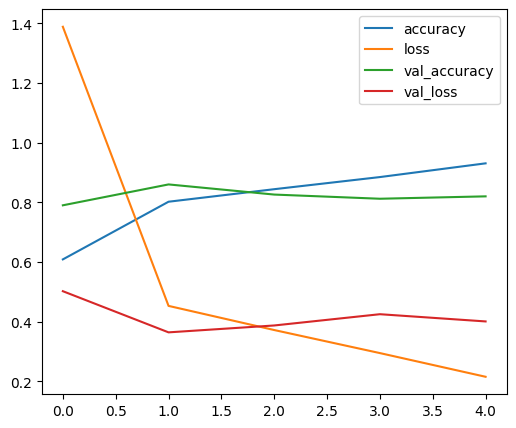

In [36]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(6,5))

In [37]:
# Plotting training and testing loss curves separately
def plot_loss_curves(history):
  """
  Returns loss curves separately
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plotting loss
  plt.figure(figsize=(6,5))
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plotting accuracy
  plt.figure(figsize=(6,5))
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **Note:**  When a model's validation loss starts to increase, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be over.

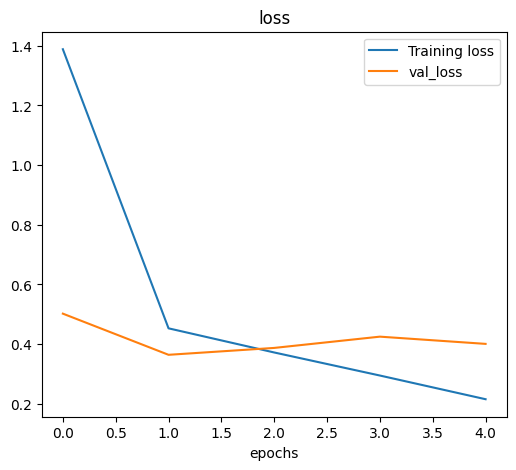

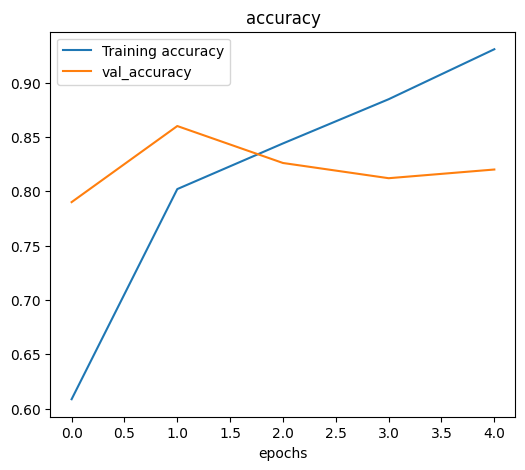

In [38]:
plot_loss_curves(history_4)

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of CONV layers
* Increase the number of CONV filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...


`Reducing overfitting is also known as **Regularization**.`

In [39]:
# Create the model ( new baseline model)
tf.random.set_seed(42)

# 1. Create a model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [41]:
# 3. Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.6667 - loss: 0.6247 - val_accuracy: 0.8180 - val_loss: 0.4061
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7789 - loss: 0.4737 - val_accuracy: 0.8460 - val_loss: 0.3644
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8191 - loss: 0.4277 - val_accuracy: 0.7700 - val_loss: 0.4797
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8132 - loss: 0.4260 - val_accuracy: 0.8680 - val_loss: 0.3465
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8419 - loss: 0.3733 - val_accuracy: 0.8660 - val_loss: 0.3206


In [42]:
# Getting summary of model_5 with MaxPooling layers
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

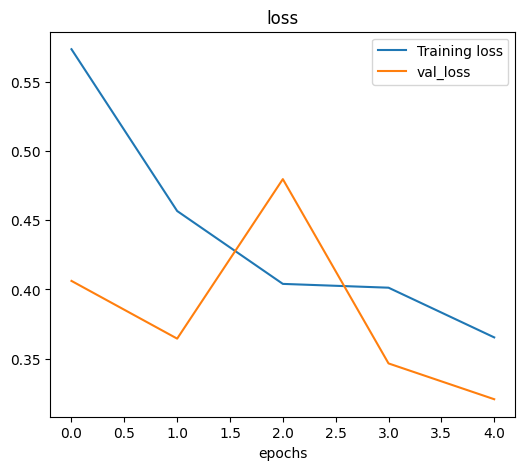

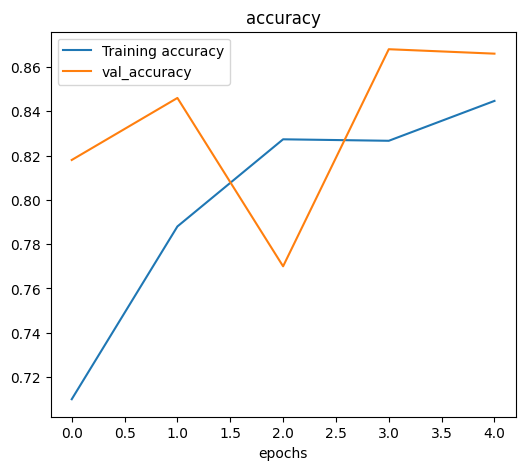

In [43]:
# Plotting loss curves
plot_loss_curves(history_5)

### Finding data augemtation

**What is Data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the roation of an image, flipping it, cropping it , etc..

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augemented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2, # how much do you want to rotate an image?
                                              shear_range=0.2, # how much do you want to shear an image?
                                              zoom_range=0.2, # zoom in randomly in your image
                                              width_shift_range=0.2, # move your image around on the x-axis
                                              height_shift_range=0.3, # move your image around on the y-axis
                                              horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datgen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:
print("Augmented training data: ")
train_data_augmented = train_datagen_augemented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)

print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Non-augmented testing data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented testing data: 
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.


Let's visualize augmented data..

In [46]:
# Getting sample data batches
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__() # note: labels aren't augmented , only data(images)


Random number image showed up: 11


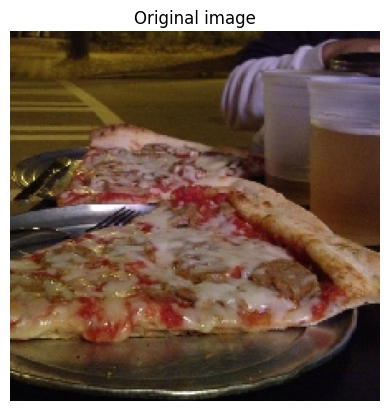

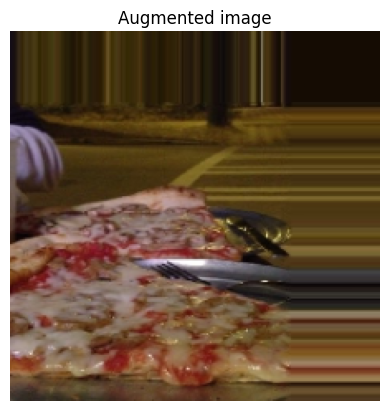

In [47]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32) # because batch size is 32..
print(f"Random number image showed up: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.show()

### Building a CNN model with augmented data

In [49]:
# Creating CNN model with augmented training data
tf.random.set_seed(42)

# 1. Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# 2. Compiling the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model ( this time with augmented data)
history_6 = model_6.fit(train_data_augmented, # Fitting on augmented data
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 489ms/step - accuracy: 0.5475 - loss: 0.7240 - val_accuracy: 0.5080 - val_loss: 0.6799
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.5443 - loss: 0.6815 - val_accuracy: 0.6260 - val_loss: 0.6633
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.6164 - loss: 0.6777 - val_accuracy: 0.7920 - val_loss: 0.5977
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 442ms/step - accuracy: 0.6557 - loss: 0.6540 - val_accuracy: 0.6380 - val_loss: 0.6290
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 471ms/step - accuracy: 0.6339 - loss: 0.6577 - val_accuracy: 0.8300 - val_loss: 0.5538


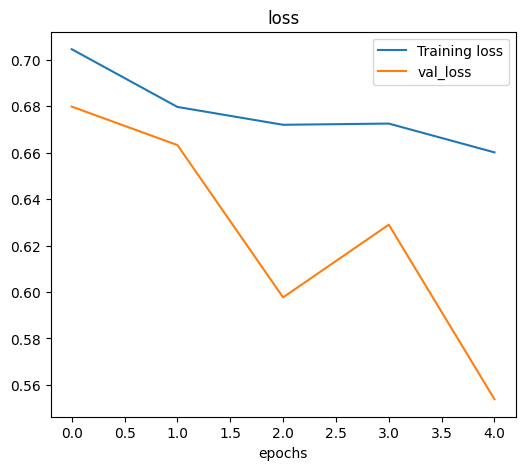

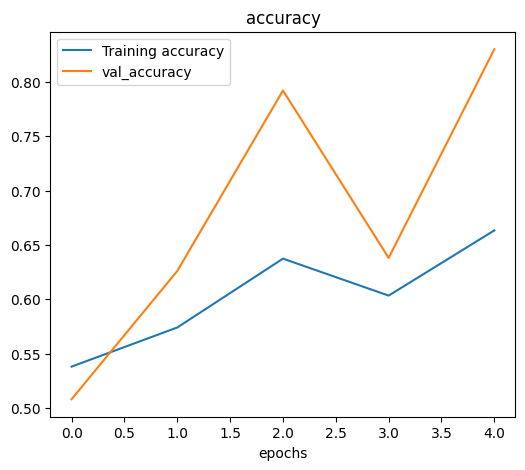

In [50]:
# Plotting loss curves
plot_loss_curves(history_6)

Our **model_6** didn't performed actually very well after doing data augmentation..


Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [51]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augemented.flow_from_directory(train_dir,
                                                                             target_size=(224,224),
                                                                             batch_size=32,
                                                                             class_mode="binary",
                                                                             shuffle=True)

Found 1500 images belonging to 2 classes.


In [52]:
tf.random.set_seed(42)

# 1. Create a model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10 , 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10 , 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model (this time with shuffled augmented data)
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 488ms/step - accuracy: 0.5877 - loss: 0.6766 - val_accuracy: 0.7700 - val_loss: 0.5837
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 461ms/step - accuracy: 0.6545 - loss: 0.6295 - val_accuracy: 0.8460 - val_loss: 0.4039
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 468ms/step - accuracy: 0.7631 - loss: 0.4985 - val_accuracy: 0.8280 - val_loss: 0.3841
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.7687 - loss: 0.5028 - val_accuracy: 0.8340 - val_loss: 0.3799
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.7651 - loss: 0.5044 - val_accuracy: 0.8500 - val_loss: 0.3641


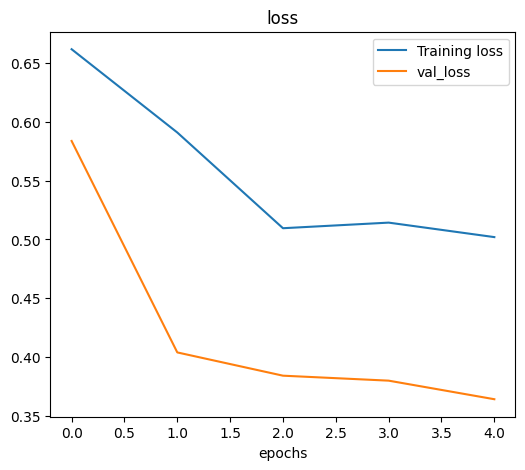

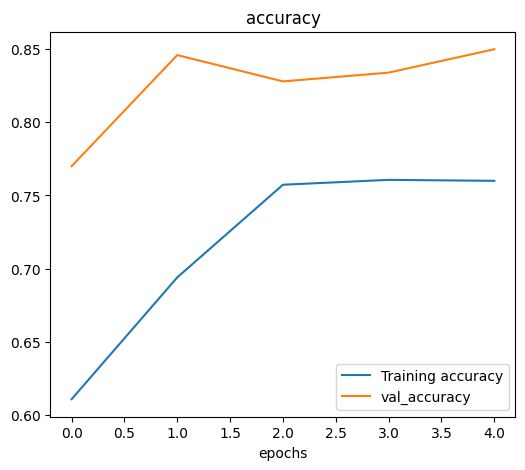

In [53]:
# Plotting loss curves
plot_loss_curves(history_7)

**Note:**  When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case pizza & steak at the same time instead of just pizza then steak).

### Experimenting and Improving our model

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers(e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layers.
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [54]:
print(class_name)

['pizza' 'steak']


--2025-08-31 12:22:36--  https://raw.githubusercontent.com/danish-khan962/Deep-Learning//main/images/04_steak_1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /danish-khan962/Deep-Learning/main/images/04_steak_1.jpg [following]
--2025-08-31 12:22:36--  https://raw.githubusercontent.com/danish-khan962/Deep-Learning/main/images/04_steak_1.jpg
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 538266 (526K) [image/jpeg]
Saving to: ‘04_steak_1.jpg’

04_steak_1.jpg      100%[===================>] 525.65K  --.-KB/s    in 0.006s  

2025-08-31 12:22:36 (80.7 MB/s) - ‘04_steak_1.jpg’ saved [538266/538266]



(np.float64(-0.5), np.float64(1079.5), np.float64(1439.5), np.float64(-0.5))

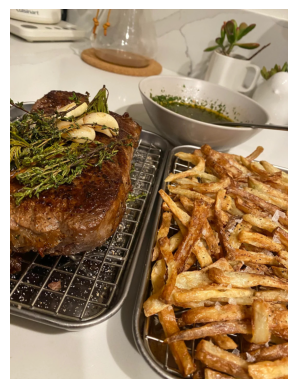

In [55]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/danish-khan962/Deep-Learning//main/images/04_steak_1.jpg
steak = mpimg.imread("04_steak_1.jpg")
plt.imshow(steak)
plt.axis(False)

In [56]:
# Check the shape of our image
steak.shape

(1440, 1080, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data or new data, than it is preprocessed into the same format as the data your model was trained on.

In [57]:
# Create a function to import image and image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to
  (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (gettting all values between 0 and 1)
  img = img/255.
  return img

In [58]:
# Load in and preprocess our custom image
steak = load_and_prep_image("04_steak_1.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.81166464, 0.7490196 , 0.65882355],
        [0.8360644 , 0.76547617, 0.6713585 ],
        [0.8352941 , 0.77254903, 0.67058825],
        ...,
        [0.8263305 , 0.7815126 , 0.6862745 ],
        [0.82715076, 0.7879351 , 0.68989587],
        [0.8224089 , 0.78319323, 0.685154  ]],

       [[0.8110644 , 0.7410764 , 0.64665866],
        [0.8411865 , 0.7705983 , 0.67648065],
        [0.8392157 , 0.78431374, 0.6735894 ],
        ...,
        [0.8456178 , 0.78679425, 0.71228445],
        [0.84992963, 0.7911061 , 0.70091003],
        [0.8392157 , 0.78039217, 0.6901961 ]],

       [[0.7713385 , 0.7004902 , 0.5776511 ],
        [0.80346143, 0.73679477, 0.61914766],
        [0.81262505, 0.75566226, 0.6346639 ],
        ...,
        [0.8546623 , 0.79831934, 0.72380954],
        [0.8444078 , 0.79454786, 0.71555626],
        [0.8386555 , 0.78879553, 0.70980394]],

       ...,

       [[0.855052  , 0.8158363 , 0.7177971 ],
        [0.85

In [59]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


array([[0.81998533]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability. Let's visualize the image as well as model's prediction..

In [60]:
class_name

array(['pizza', 'steak'], dtype='<U5')

In [61]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_name[int(tf.round(pred))]
pred_class

np.str_('steak')

In [62]:
def pred_and_plot(model, filename, class_name):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_name[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


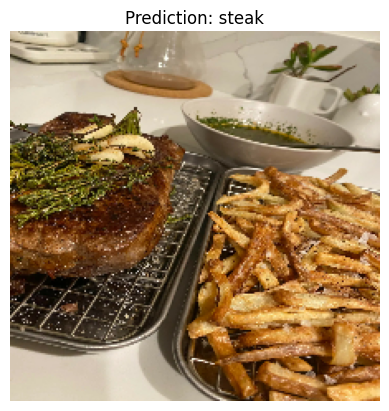

In [63]:
# Test our model on a custom image
pred_and_plot(model_7, "04_steak_1.jpg", class_name=class_name)

--2025-08-31 12:22:50--  https://raw.githubusercontent.com/danish-khan962/Deep-Learning/main/images/04_pizza_3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353961 (346K) [image/jpeg]
Saving to: ‘04_pizza_3.jpg’

04_pizza_3.jpg      100%[===================>] 345.67K  --.-KB/s    in 0.004s  

2025-08-31 12:22:51 (86.9 MB/s) - ‘04_pizza_3.jpg’ saved [353961/353961]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


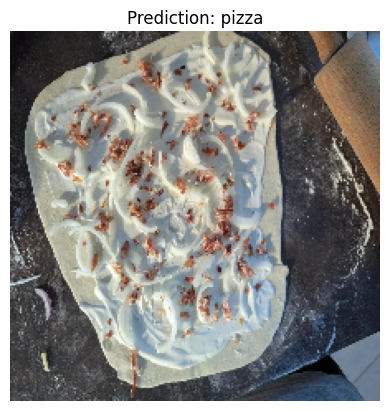

In [64]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/danish-khan962/Deep-Learning/main/images/04_pizza_3.jpg
pred_and_plot(model_7, "04_pizza_3.jpg", class_name=class_name)

# Multiclass Image Classification

1. Understand the data
2. Preprocess the data
3. Create a model (starts with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try beating baseline/reduce overfitting)
7. Repeat and repeat

### Importing data

In [74]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-08-31 12:43:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  21.5MB/s    in 23s     

2025-08-31 12:43:48 (21.1 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [75]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`.")


There are 2 directories and 0 images in `10_food_classes_all_data`.
There are 10 directories and 0 images in `10_food_classes_all_data/test`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/fried_rice`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/steak`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/pizza`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/ice_cream`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/sushi`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/chicken_curry`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/ramen`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/chicken_wings`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/grilled_salmon`.
There are 0 directories and 250 images in `10_food_classes_all_data/test/hamburger`.
There are 

In [82]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [87]:
# Let's get classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['953649.jpg']
Image shape: (512, 512, 3)


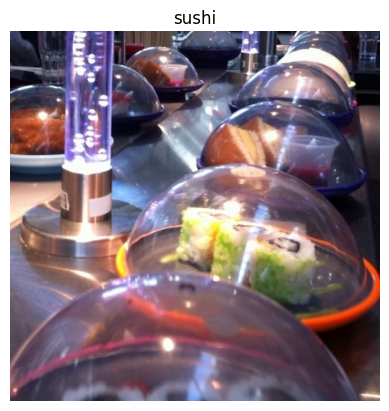

In [94]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### Preprocess the data

In [96]:
# Creating training and testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [97]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="categorical",
                                              batch_size=32,
                                              shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (starts with a baseline)

CNN explainer also works with 10 classes , why not we try to implement that Tiny VGG model.

In [100]:
import tensorflow as tf

# Setting random seed for reproducability
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 130ms/step - accuracy: 0.1475 - loss: 2.2443 - val_accuracy: 0.2600 - val_loss: 2.0863
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.2932 - loss: 1.9759 - val_accuracy: 0.3332 - val_loss: 1.8941
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.3959 - loss: 1.7719 - val_accuracy: 0.3556 - val_loss: 1.8587
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.5078 - loss: 1.4679 - val_accuracy: 0.3376 - val_loss: 1.9317
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.7117 - loss: 0.9067 - val_accuracy: 0.3172 - val_loss: 2.3147


### Evaluate the model

In [101]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.3380 - loss: 2.2284


[2.314664363861084, 0.3172000050544739]

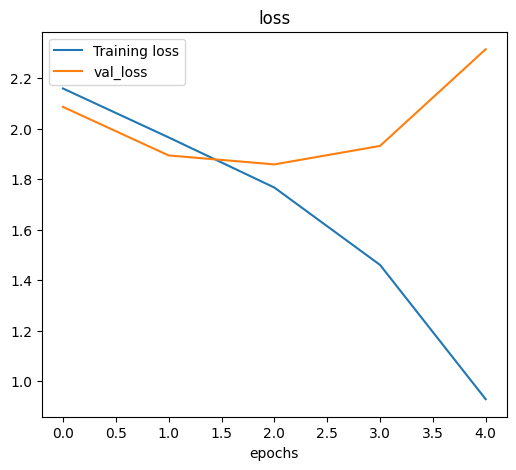

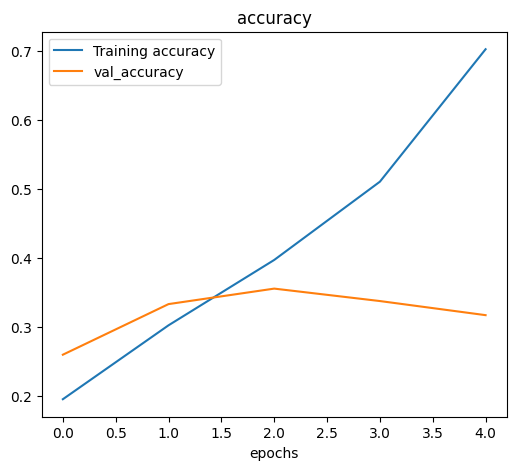

In [103]:
# Plotting the loss curves of model_8
plot_loss_curves(history_8)

It seems our model is overfitting...

### Adjusting the model parameters (try to beat the baseline model `model_8`)